<a href="https://colab.research.google.com/github/nicoleli04/CSE151A-Project/blob/Milestone-2/Skincare_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r CSE151A-Project
!git clone https://github.com/nicoleli04/CSE151A-Project

Cloning into 'CSE151A-Project'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 115 (delta 36), reused 27 (delta 1), pack-reused 0
Receiving objects: 100% (115/115), 21.59 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#original datasets:
sephora = pd.read_csv('/content/CSE151A-Project/SephoraData.csv')
indonesia = pd.read_csv('/content/CSE151A-Project/IndonesiaReviews.csv')
skinsort = pd.read_csv('/content/CSE151A-Project/SkinsortData.csv')

#Data Exploring#

In [ ]:
sephora

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [ ]:
indonesia

,Category,Merk,Product,Price,OverallRating,Reviewer
0,Night Cream,Hada Labo,Perfect 3D Gel,Rp. 91.000,3.8,978.0
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,Rp. 27.000,4.2,3851.0
2,Night Cream,Wardah,Lightening Night Cream,Rp. 0,3.5,806.0
3,Face Mist,Avene,Thermal Spring Water,Rp. 199.000,4.4,1239.0
4,Night Cream,Wardah,White Secret Night Cream,Rp. 98.000,3.6,572.0
...,...,...,...,...,...,...
856,Toner,Paula's Choice,Skin Perfecting 2% BHA Liquid Exfoliant,Rp. 390.000,4.3,397.0
857,Toner,Cosrx,Natural BHA Skin Returning A-Sol,Rp. 0,3.8,386.0
858,Toner,Ovale,Facial Lotion,Rp. 15.000,2.9,372.0
859,Toner,Cosrx,Centella Water Alcohol-Free Toner,Rp. 157.000,4.0,367.0


In [ ]:
skinsort

,brand,name,type,country,ingridients,afterUse
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ..."
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexan...","Good For Oily Skin,Redness Reducing,Reduces Ir..."
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight..."
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu..."
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ..."
...,...,...,...,...,...,...
19045,CeraVe,Hydrating Facial Cleanser,Face Cleanser,Canada,"Water,Glycerin,Cetearyl Alcohol,Peg-40 Stearat...","Redness Reducing,Anti-Aging,Scar Healing,Brigh..."
19046,Beauty of Joseon,Ginseng Essence Water,Essence,South Korea,"Panax Ginseng Root Water,Butylene Glycol,Glyce...","Good For Oily Skin,Redness Reducing,Reduces Ir..."
19047,CeraVe,PM Facial Moisturizing Lotion,Night Moisturizer,Canada,"Water,Glycerin,Caprylic/Capric Triglyceride,Ni...","Good For Oily Skin,Redness Reducing,Anti-Aging..."
19048,The Ordinary,AHA 30% + BHA 2% Peeling Solution,Facial Treatment,Canada,"Glycolic Acid,Water,Aloe Barbadensis Leaf Wate...","Good For Oily Skin,Reduces Irritation,Skin Tex..."


#Data Cleaning#

We have two review datasets from Sephora and Indonesia. Here our goal is to combine these datasets into a single, larger dataset. To achieve this, we will retain only the columns for ratings and product names, and then merge the two datasets together into a dataset named reviews.

In [ ]:
indonesia.rename(columns = {"Product": "name", "OverallRating": "rating"}, inplace = True)
sephora.rename(columns = {"product_name": "name"}, inplace = True)
s = sephora[['name', 'rating']] #add price?
i = indonesia[['name', 'rating']]
reviews = pd.concat([s, i]) #concatenate the two datasets into the reviews dataset
i.head()
s.head()
reviews.head()
reviews.shape
reviews.value_counts('name')
reviews = reviews.drop_duplicates(subset=['name']) #drop duplicates
reviews.shape
reviews.value_counts('name')

name
"B" Oil                                                 1
Over It Magic Self-Tan Eraser                           1
Out of Trouble 10 Minute Mask to Rescue Problem Skin    1
Outrageous Plump Intense Hydrating Lip Gloss            1
Outrageous Plumping Lip Gloss                           1
                                                       ..
Gentle Cleansing Oil                                    1
Gentle Cleansing Milk                                   1
Gentle Cleansing Foam Hydrating Makeup Remover          1
Gentle Buffing Cream                                    1
’REPLICA’ Sailing Day Travel Spray                      1
Name: count, Length: 9195, dtype: int64

Used chatgpt to learn how to vectorize and merge the datasets using a similarity matrix (prompt and additional information given in the collaboration section). This enabled us to match ratings to products based on how similar the names from both datasets were. The prompt we used along with the response is at the end of the notebook, under the Collaboration Statement heading. We set the threshold of similarity acceptance to 0.4, to ensure that the product doesn't match with the review if the names are highly dissimilar.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #to vectorize
from sklearn.metrics.pairwise import cosine_similarity #to create the similarity matrix
import re #regular expression operations

# Create DataFrames
products_df = pd.DataFrame(skinsort)
reviews_df = pd.DataFrame(reviews)

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['name'] = products_df['name'].apply(preprocess_text)
reviews_df['name'] = reviews_df['name'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
tfidf_products = vectorizer.fit_transform(products_df['name'])
tfidf_reviews = vectorizer.transform(reviews_df['name'])

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Initialize a list to hold the matched products
matched_products = []
similarity_threshold = 0.4  # Set your desired similarity threshold here

# Copy similarity_matrix to avoid modifying the original
sim_matrix_copy = similarity_matrix.copy()

# Loop through each review
for i in range(len(reviews_df)):
    # Find the index of the highest similarity score for the current review
    best_match_idx = np.argmax(sim_matrix_copy[i])
    # Check if the highest similarity score is above the threshold
    if sim_matrix_copy[i, best_match_idx] >= similarity_threshold:
        # Append the matched product from products_df
        matched_products.append(products_df['name'].iloc[best_match_idx])
        # Set the highest similarity score to a very low value to prevent re-matching
        sim_matrix_copy[:, best_match_idx] = -1
    else:
        # If no match is found above the threshold, append None
        matched_products.append(None)

# Add the matched products to the reviews_df
reviews_df['Matched_Product'] = matched_products

# Merge the reviews into the products DataFrame based on the best matches
merged_df = products_df.merge(reviews_df.drop(columns='name'), left_on='name', right_on='Matched_Product', how='left')

# Remove entries where no product was matched (Matched_Product is None)
merged_df = merged_df.dropna(subset=['Matched_Product', 'rating'])

# Drop duplicates and unnecessary columns
merged_df = merged_df.drop_duplicates('name').drop_duplicates('Matched_Product').drop(columns=['Matched_Product'])

# Display the merged DataFrame
merged_df
merged_df.to_csv('finalskincarelist_df.csv', index=False)
merged_df.head()


,brand,name,type,country,ingridients,afterUse,rating
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578


In [ ]:
#Changing the column names
merged_df.rename(columns = {"brand": "Brand", "name": "Name", "type": "Type", "country": "Country", "ingridients":"Ingredients", "afterUse": "Results", "rating": "Rating"}, inplace = True)
merged_df.head()

,Brand,Name,Type,Country,Ingredients,Results,Rating
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578


#Data Preprocessing and Plotting#

Since most of our data is of the type string, we couldn't generate a meaninful pairplot. Below is the pairplot generated before we encoded our data:

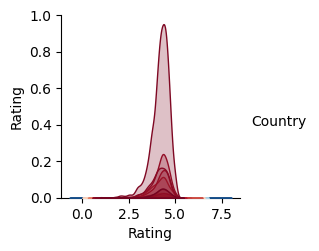

In [ ]:
sns.pairplot(merged_df, hue ='Country', palette='RdBu')

In [ ]:
#Dropped the null values in the Results column:
merged_df.dropna(subset=['Results'], inplace=True)
merged_df.shape

(5584, 7)

In [ ]:
#This gives us the mean and other useful descriptions of the data, specifically the rating column
merged_df.describe()

,Rating
count,5584.000000
mean,4.175367
std,0.493009
min,1.000000
25%,3.954125
50%,4.262100
75%,4.503075
max,5.000000


In [ ]:
#We used this to check if there were any other null values in our data frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5584 entries, 0 to 19505
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        5584 non-null   object 
 1   Name         5584 non-null   object 
 2   Type         5580 non-null   object 
 3   Country      5584 non-null   object 
 4   Ingredients  5584 non-null   object 
 5   Results      5584 non-null   object 
 6   Rating       5584 non-null   float64
dtypes: float64(1), object(6)
memory usage: 349.0+ KB


In [ ]:
#We dropped the null values in the Type column
merged_df["Type"].dropna()

0                      Toner
2           Facial Treatment
3              Face Cleanser
4              Face Cleanser
6                      Serum
                ...         
19498    General Moisturizer
19500                  Serum
19503      Night Moisturizer
19504       Facial Treatment
19505                Essence
Name: Type, Length: 5580, dtype: object

In [ ]:
merged_df.loc[merged_df['Type'] == np.nan]

,Brand,Name,Type,Country,Ingredients,Results,Rating


In [ ]:
#Created a copy of our dataframe and removed the non-skincare related products
merged_df_copy = merged_df[~merged_df['Type'].isin(["Face Makeup", "Eye Makeup", "Lip Makeup", "Makeup Applicator", "False Eyelash", "Cheek Makeup"])]

In [ ]:
merged_df_copy.shape

(4540, 7)

In [ ]:
merged_df_copy['Type'].value_counts()

Type
Serum                  586
General Moisturizer    544
Face Cleanser          411
Bath & Body            289
Other Haircare         274
Sunscreen              244
Eye Moisturizer        238
Toner                  200
Facial Treatment       193
Wet Mask               176
Shampoo                175
Exfoliator             166
Lip Moisturizer        161
Makeup Remover         141
Oil                    118
Conditioner            109
Night Moisturizer       75
Sheet Mask              74
Day Moisturizer         64
Overnight Mask          55
Hand Care               53
Essence                 51
Tanning                 42
Lip Mask                38
Eye Mask                28
Nail Care               25
Emulsion                 6
Name: count, dtype: int64

In [ ]:
merged_df['Type'].value_counts()
# merged_df['Brand'].value_counts()

Type
Serum                  586
General Moisturizer    544
Face Makeup            430
Face Cleanser          411
Bath & Body            289
Eye Makeup             277
Other Haircare         274
Sunscreen              244
Eye Moisturizer        238
Toner                  200
Facial Treatment       193
Wet Mask               176
Shampoo                175
Exfoliator             166
Lip Moisturizer        161
Makeup Remover         141
Oil                    118
Fragrance              117
Lip Makeup             115
Conditioner            109
Cheek Makeup            75
Night Moisturizer       75
Sheet Mask              74
Day Moisturizer         64
Overnight Mask          55
Hand Care               53
Essence                 51
Tanning                 42
Lip Mask                38
Eye Mask                28
Nail Care               25
Makeup Applicator       21
Tool                     7
Emulsion                 6
False Eyelash            2
Name: count, dtype: int64

In [ ]:
#We noticed that there were some null values under Country, so we added an "Unknown" string instead so the data type would be consistent
merged_df["Country"].fillna("Unknown", inplace=True)
merged_df["Country"].value_counts()

Country
United States                        2708
Unknown                               652
South Korea                           546
France                                401
United Kingdom                        350
Canada                                136
Japan                                 132
Australia                              99
Germany                                80
Denmark                                47
Italy                                  39
England                                38
Poland                                 29
Netherlands                            27
Spain                                  26
Sweden                                 25
Switzerland                            22
Greece                                 21
Turkey                                 20
India                                  20
New Zealand                            19
Singapore                              13
Philippines                            13
Indonesia                 

In [ ]:
#We encoded the Type and the Country to generate more meaningful plots using the encoded data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df_copy['Type_label'] = le.fit_transform(merged_df_copy['Type'])
merged_df_copy['Country_label'] = le.fit_transform(merged_df_copy['Country'])

<ipython-input-166-e83cf3ca4019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copy['Type_label'] = le.fit_transform(merged_df_copy['Type'])
<ipython-input-166-e83cf3ca4019>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copy['Country_label'] = le.fit_transform(merged_df_copy['Country'])


In [ ]:
merged_df_copy

,Brand,Name,Type,Country,Ingredients,Results,Rating,Type_label,Country_label
0,The Ordinary,glycolic acid 7 toning solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ...",4.3456,26,8
2,The Ordinary,niacinamide 10 zinc 1,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight...",3.9000,9,8
3,Youth To The People,superfood antioxidant cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu...",4.2112,8,53
4,COSRX,low ph good morning gel cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ...",4.0000,8,44
6,The Ordinary,azelaic acid suspension 10,Serum,Canada,"Water,Isodecyl Neopentanoate,Dimethicone,Azela...","Redness Reducing,Anti-Aging,Dark Spots,Scar He...",4.1578,21,8
...,...,...,...,...,...,...,...,...,...
19498,Isntree,hyaluronic acid aqua gel cream,General Moisturizer,South Korea,"Water,Methylpropanediol,Coco-Caprylate,1,2-Hex...","Good For Oily Skin,Redness Reducing,Reduces Ir...",3.5000,11,44
19500,The Ordinary,caffeine solution 5 egcg,Serum,Canada,"Water,Caffeine,Maltodextrin,Glycerin,Propanedi...","Good For Oily Skin,Skin Texture,Reduces Large ...",3.7715,21,8
19503,CeraVe,pm facial moisturizing lotion,Night Moisturizer,Canada,"Water,Glycerin,Caprylic/Capric Triglyceride,Ni...","Good For Oily Skin,Redness Reducing,Anti-Aging...",4.4000,17,8
19504,The Ordinary,aha 30 bha 2 peeling solution,Facial Treatment,Canada,"Glycolic Acid,Water,Aloe Barbadensis Leaf Wate...","Good For Oily Skin,Reduces Irritation,Skin Tex...",4.5734,9,8


We generated pairplots, histplots, and countplots using rating, country and type:

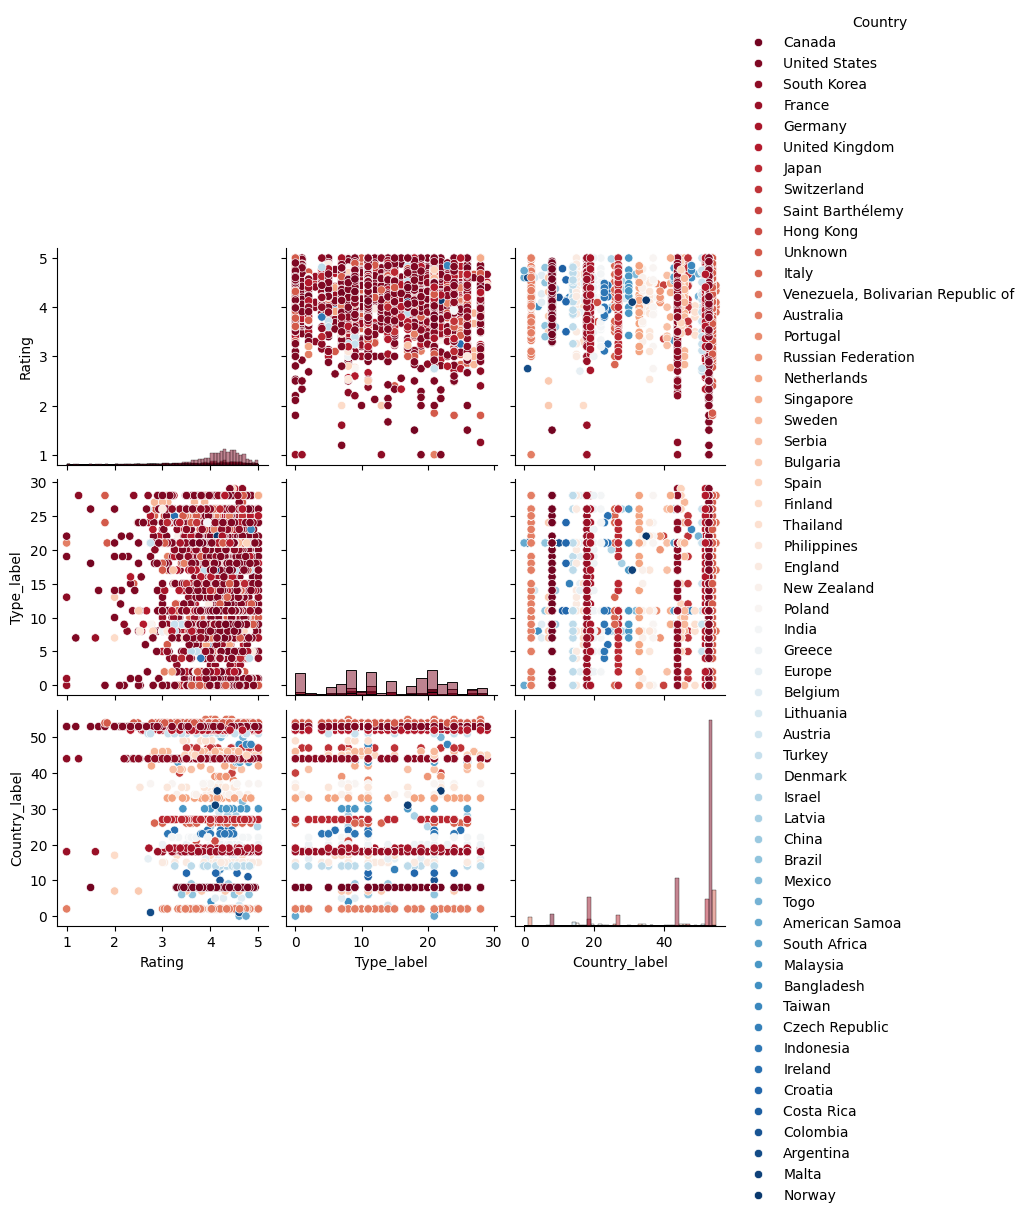

In [ ]:
sns.pairplot(merged_df_copy, hue ='Country', palette= 'RdBu', diag_kind='hist')

<Axes: xlabel='Type_label', ylabel='count'>

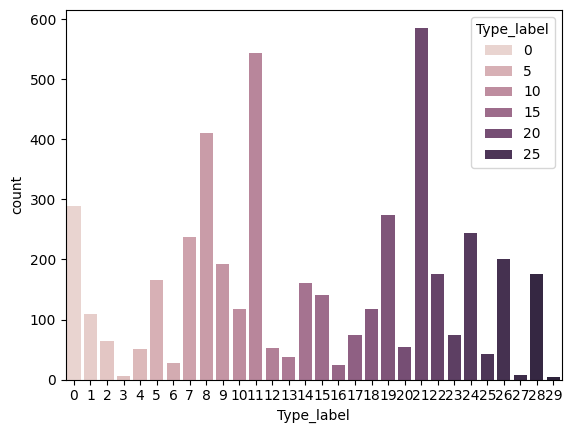

In [ ]:
sns.countplot(data=merged_df_copy,x='Type_label', hue = 'Type_label')

<Axes: xlabel='Country_label', ylabel='count'>

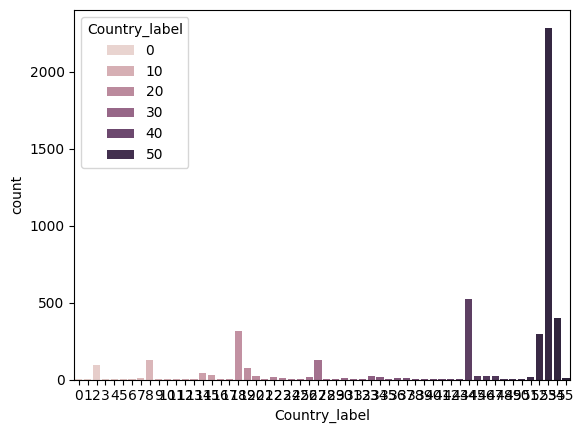

In [ ]:
sns.countplot(data=merged_df_copy,x='Country_label', hue = 'Country_label')

<Axes: xlabel='Rating', ylabel='count'>

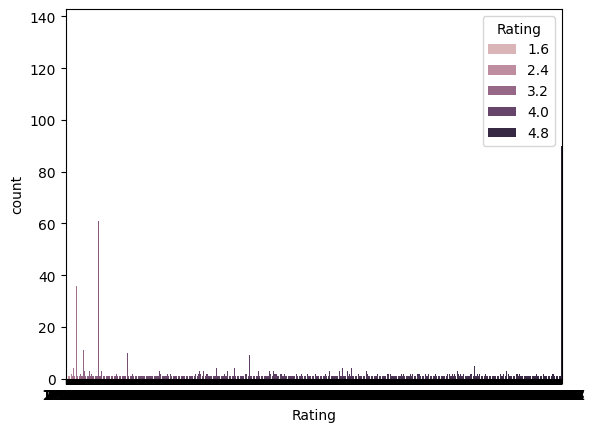

In [ ]:
sns.countplot(data=merged_df_copy,x='Rating', hue = 'Rating')

<Axes: xlabel='Rating', ylabel='Count'>

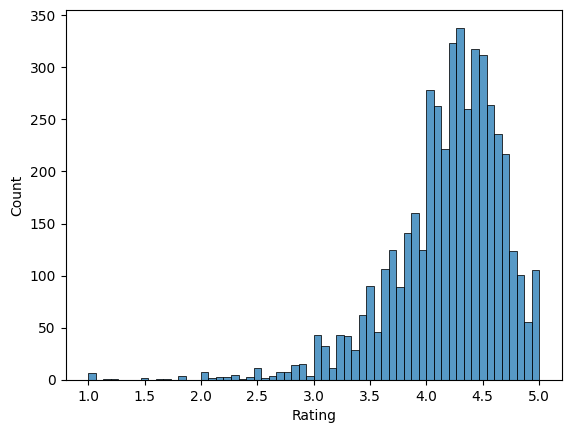

In [ ]:
sns.histplot(data=merged_df_copy,x='Rating')

###Collaboration Statement

We asked chatgpt how to create a similarity matrix to connect our two datasets together. Below is our exact prompt and code received with chatgpt:

how do i do similairty testing between tehdatasets to see if some of the products arethe same

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the datasets
products_df = pd.read_csv('/path/to/your/products.csv')
reviews_df = pd.read_csv('/path/to/your/reviews.csv')

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['Product'] = products_df['Product'].apply(preprocess_text)
reviews_df['Product'] = reviews_df['Product'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
combined_product_names = pd.concat([products_df['Product'], reviews_df['Product']])
tfidf_matrix = vectorizer.fit_transform(combined_product_names)
tfidf_products = tfidf_matrix[:len(products_df)]
tfidf_reviews = tfidf_matrix[len(products_df):]

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Match products based on similarity scores
best_match_indices = similarity_matrix.argmax(axis=1)
reviews_df['Matched_Product'] = products_df['Product'].iloc[best_match_indices].values

# Display the first few rows of the updated reviews_df
print("\nReviews DataFrame with Matched Products:")
print(reviews_df[['Product', 'Matched_Product']].head())

what i want to do is that i want my product to be the base and match my reviews to the products. I want them to be merged together based on the similiarity testing of the product name on reviews and have all the review columns (excluding product name) to be added onto the product

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Mock data for products_df
products_data = {
    'Category': ['Night Cream', 'Face Mist', 'Night Cream', 'Face Mist', 'Night Cream'],
    'Merk': ['Hada Labo', 'PIXY', 'Wardah', 'Avene', 'Wardah'],
    'Product': ['Perfect 3D Gel', 'Aqua Beauty Protecting Mist', 'Lightening Night Cream', 'Thermal Spring Water', 'White Secret Night Cream'],
    'Price': ['Rp. 91.000', 'Rp. 27.000', 'Rp. 0', 'Rp. 199.000', 'Rp. 98.000'],
    'OverallRating': [3.8, 4.2, 3.5, 4.4, 3.6],
    'Reviewer': [978.0, 3851.0, 806.0, 1239.0, 572.0]
}

# Mock data for reviews_df
reviews_data = {
    'Product': ['Aqua Beauty Protecting Mist', 'White Secret Night Cream', 'Lightening Night Cream', 'Perfect 3D Gel', 'Thermal Spring Water'],
    'Review': ['Great mist!', 'Works well.', 'Good result.', 'Very effective.', 'Refreshing!']
}

# Create DataFrames
products_df = pd.DataFrame(products_data)
reviews_df = pd.DataFrame(reviews_data)

print("Products DataFrame:")
print(products_df)

print("\nReviews DataFrame:")
print(reviews_df)

# Preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

products_df['Product'] = products_df['Product'].apply(preprocess_text)
reviews_df['Product'] = reviews_df['Product'].apply(preprocess_text)

# Vectorize text data
vectorizer = TfidfVectorizer()
combined_product_names = pd.concat([products_df['Product'], reviews_df['Product']])
tfidf_matrix = vectorizer.fit_transform(combined_product_names)
tfidf_products = tfidf_matrix[:len(products_df)]
tfidf_reviews = tfidf_matrix[len(products_df):]

# Calculate similarity scores
similarity_matrix = cosine_similarity(tfidf_reviews, tfidf_products)

# Match products based on similarity scores
best_match_indices = similarity_matrix.argmax(axis=1)
reviews_df['Matched_Product'] = products_df['Product'].iloc[best_match_indices].values

# Merge the reviews into the products DataFrame based on the best matches
merged_df = products_df.merge(reviews_df.drop(columns='Product'), left_on='Product', right_on='Matched_Product', how='left')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)